In [1]:
import sklearn
import os
import pandas as pd

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

/home/syed-khizar/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X,y = mnist['data'] , mnist['target'] 

In [5]:
print(X.head())
print(y.head())


   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  pixel783  pixel784  
0       0.0       

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [8]:
y = y.astype(np.uint8)

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

`Binary Classifier`


In [10]:
y_train_5 = y_train == 5
y_test_5 = y_test == 5

In [11]:
from sklearn.linear_model import SGDClassifier

In [12]:
sgd = SGDClassifier(random_state=42)

In [13]:
sgd.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [14]:
digit = X.loc[0]

In [15]:
X.loc[0].shape

(784,)

In [16]:
sgd.predict([digit])

/home/syed-khizar/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

`Performance Measures`

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [18]:
skfolds = StratifiedKFold(n_splits=3)

In [19]:
for train_index,test_index in skfolds.split(X_train,y_train_5):
    clone_sgd = clone(sgd)
    X_train_fold = X_train[train_index]
    y_train_fold = y_train_5[train_index]
    X_test_fold = X_test[test_index]
    y_test_fold = y_test_5[test_index]

    clone_sgd.fit(X_train_fold,y_train_fold)
    pred = clone_sgd.predict(X_test_fold)

  
   
    
    

KeyError: "None of [Index([19964, 19965, 19966, 19967, 19968, 19969, 19970, 19971, 19972, 19974,\n       ...\n       59990, 59991, 59992, 59993, 59994, 59995, 59996, 59997, 59998, 59999],\n      dtype='int64', length=40000)] are in the [columns]"

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd,X_train, y_train_5, cv=3, scoring="accuracy")

In [ ]:
from sklearn.base import BaseEstimator

class Not5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [ ]:
never_5_clf = Not5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

`Confusion Matrix `


In [ ]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(sgd,X_train,y_train_5,cv=3)

In [ ]:
len(y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_pred,y_train_5)

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
precision_score(y_train_5,y_pred)

In [ ]:
recall_score(y_train_5,y_pred)

In [55]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_train_5,y_pred)

In [ ]:
score = sgd.decision_function([digit])
score

In [ ]:
score > 0

In [25]:
from sklearn.model_selection import cross_val_predict

In [26]:
scores = cross_val_predict(sgd,X_train,y_train_5,method="decision_function",cv=3)

In [27]:
from sklearn.metrics import precision_recall_curve

In [28]:
precisions , recalls , thresholds = precision_recall_curve(y_train_5,scores)

In [29]:
thresholds


array([-146348.56726174, -142300.00705404, -137588.97581744, ...,
         38871.26391927,   42216.05562787,   49441.43765905])

In [30]:
import matplotlib.pyplot as plt


In [31]:
def plot_precision_vs_recall_curve(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],"g-",label="Recall")
    plt.legend()
    plt.grid()
    

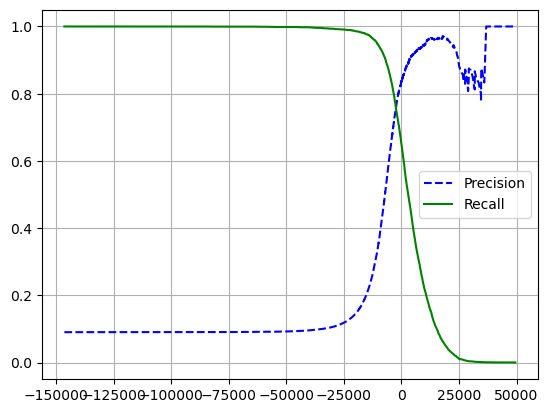

In [32]:
plot_precision_vs_recall_curve(precisions, recalls, thresholds)
plt.show()

In [33]:
import numpy as np

In [34]:
scores_90 = thresholds[np.argmax(precisions>=0.90)]
y_train_5_90 = (scores >= scores_90 )
len(y_train_5_90)

60000

In [35]:
from sklearn.metrics import precision_score , recall_score

In [36]:
precision_score(y_train_5,y_train_5_90)



0.9000345901072293

In [37]:
recall_score(y_train_5,y_train_5_90)

0.4799852425751706

In [38]:
from sklearn.metrics import roc_curve

In [40]:
fpr,tpr,thresholds = roc_curve(y_train_5, scores)

In [41]:
def plotter(fpr,tpr,thresholds):
    plt.plot(fpr,tpr)
    plt.plot([0, 1], [0, 1], 'k--')

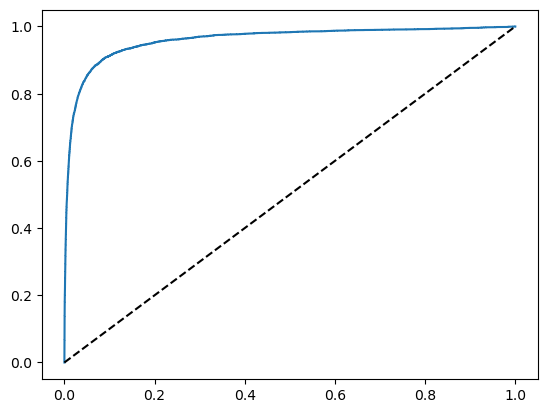

In [42]:
plotter(fpr,tpr,thresholds)
plt.show()

In [43]:
from sklearn.metrics import roc_auc_score

In [44]:
roc_auc_score(y_train_5,scores)

0.9604938554008616

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rfc = RandomForestClassifier(random_state=42)
probs = cross_val_predict(rfc,X_train,y_train_5,method='predict_proba',cv=3)

In [47]:
scores_prob = probs[:,1] # use proba of positive class as score

In [49]:
tpr,fpr,thresholds = roc_curve(y_train_5,scores_prob)

In [51]:
tpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.83220653e-05, 5.49661958e-05, 5.49661958e-05, 5.49661958e-05,
       5.49661958e-05, 5.49661958e-05, 9.16103263e-05, 9.16103263e-05,
       1.09932392e-04, 1.09932392e-04, 1.09932392e-04, 1.09932392e-04,
       1.28254457e-04, 1.28254457e-04, 1.64898587e-04, 2.19864783e-04,
       2.19864783e-04, 2.56508914e-04, 2.56508914e-04, 2.74830979e-04,
       2.93153044e-04, 2.93153044e-04, 3.48119240e-04, 3.84763371e-04,
       4.21407501e-04, 4.39729566e-04, 4.58051632e-04, 5.13017827e-04,
       5.49661958e-04, 6.22950219e-04, 6.96238480e-04, 6.96238480e-04,
       7.51204676e-04, 8.24492937e-04, 8.97781198e-04, 1.08100185e-03,
       1.13596805e-03, 1.28254457e-03, 1.42912109e-03, 1.52073142e-03,
      

In [52]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [53]:
knn_clf.predict([digit])

/home/syed-khizar/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

In [56]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")
print(y_train_knn_pred)

[[False  True]
 [False False]
 [False False]
 ...
 [False  True]
 [False False]
 [ True False]]
